## KNN Classifier on COVID CT SCAN Images
### Submitted By: Garvit Khurana
### 500076532 | R177219080
### B.Tech CSE AI ML Batch 3 (2019-23)

### Import necessary libraries

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from IPython.display import Image
from time import time
from pylab import imshow, gray, show
from os import path
import random
%matplotlib inline

### Extract Feature - Raw Pixel Intensity

In [2]:
def image_to_feature_vector(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert from BGR to Grayscale
    return cv2.resize(image, (60, 60)).flatten()

### Specify the directory for the CT scan images, and initialize the matrices

In [3]:
imagePaths = list(paths.list_images("H:/Sem-IV/Machine Learning/SARS_CTSCAN"))
rawImages = []
labels = []
features = []

### Benchmark function

In [4]:
results = []
def benchmark(clf, name):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)
    
    print()

    score = accuracy_score(y_test, pred)
    print("Train Accuracy: %0.3f" % accuracy_score(y_train, clf.predict(X_train)))
    print("Test Accuracy: %0.3f" % score)

    print()

    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))
    
    print()
    print("classification report:")
    print(classification_report(y_test, pred))

    print("confusion matrix:")
    print(confusion_matrix(y_test, pred))
    
    
    print()
    clf_descr = name
    return clf_descr, score, train_time, test_time

### Loop over the input images:
#### 1) load the image and extract the class label (assuming that our path is in the format: /path/to/dataset/{class} {image_num}.jpg
#### 2) extract the Raw Pixel Intensity
#### 3) update the matricies respectively

In [5]:
labels =[]
start_time = time()
for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath)
    label = imagePath.split(os.path.sep)[-1].split(" ")[0]

    pixels = image_to_feature_vector(image)

    rawImages.append(pixels)
    labels.append(label)
    
    if i > 0 and i % 100 == 0:    # show an update every 100 images
        print("[INFO] Processed {}/{}".format(i, len(imagePaths)))
print("[INFO] Processed {}/{}".format(i+1, len(imagePaths)))
print("--- %s seconds ---" % (time() - start_time))


[INFO] Processed 100/2481
[INFO] Processed 200/2481
[INFO] Processed 300/2481
[INFO] Processed 400/2481
[INFO] Processed 500/2481
[INFO] Processed 600/2481
[INFO] Processed 700/2481
[INFO] Processed 800/2481
[INFO] Processed 900/2481
[INFO] Processed 1000/2481
[INFO] Processed 1100/2481
[INFO] Processed 1200/2481
[INFO] Processed 1300/2481
[INFO] Processed 1400/2481
[INFO] Processed 1500/2481
[INFO] Processed 1600/2481
[INFO] Processed 1700/2481
[INFO] Processed 1800/2481
[INFO] Processed 1900/2481
[INFO] Processed 2000/2481
[INFO] Processed 2100/2481
[INFO] Processed 2200/2481
[INFO] Processed 2300/2481
[INFO] Processed 2400/2481
[INFO] Processed 2481/2481
--- 5.996624231338501 seconds ---


### Show some information on the memory consumed

In [6]:
rawImages = np.array(rawImages)
'''
labels = np.array(labels)
labels = labels.shape
labels =labels.reshape(-1,1)'''
print("[INFO] pixels matrix: {} {:.2f}MB".format(
    rawImages.shape, rawImages.nbytes / (1024 * 1000.0)))


[INFO] pixels matrix: (2481, 3600) 8.72MB


### Split partition the data into training and testing splits, using 80% of the data for training and 20% for testing, with a random state of 10

In [7]:
(trainRI, testRI, trainRL, testRL) = train_test_split(rawImages, labels, test_size=0.20, random_state=10)

### Training the algorithms using the Raw Pixel Intensities
### Show a sample of CT Scan Images

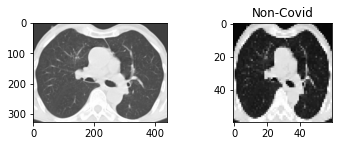

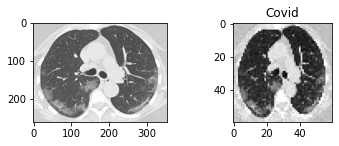

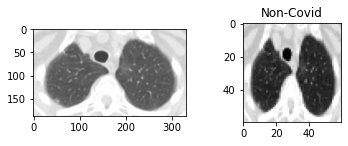

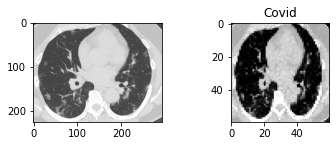

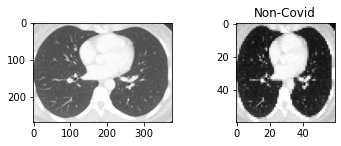

In [8]:
rand = random.choices(imagePaths, k=5)
for (i, rand) in enumerate(rand):
    img = cv2.imread(rand)
    plt.subplot(2,2,1), imshow(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (60, 60))
    label = rand.split(os.path.sep)[-1].split(" ")[0]
    plt.subplot(2,2,2), imshow(img, 'gray')
    plt.title(label)
    plt.show()

### Specify the inputs

In [9]:
X = rawImages
y = labels
X_train = trainRI
X_test = testRI
y_train = trainRL
y_test = testRL

### Perform standardization by centering and scaling the training set

In [10]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

### Train and evaluate a k-NN classifer on the raw pixel intensities

In [11]:
print("[INFO] evaluating k-NN on raw pixel accuracy...")
knn = KNeighborsClassifier(n_neighbors=3)
results.append(benchmark(knn, 'k-NN on Raw Pixels'))

[INFO] evaluating k-NN on raw pixel accuracy...
________________________________________________________________________________
Training: 
KNeighborsClassifier(n_neighbors=3)
train time: 1.568s
test time:  7.993s

Train Accuracy: 0.970
Test Accuracy: 0.911


classification report:
              precision    recall  f1-score   support

       Covid       0.91      0.91      0.91       248
   Non-Covid       0.91      0.92      0.91       249

    accuracy                           0.91       497
   macro avg       0.91      0.91      0.91       497
weighted avg       0.91      0.91      0.91       497

confusion matrix:
[[225  23]
 [ 21 228]]



from sklearn.naive_bayes import GaussianNB

resultsNaiveBayes = []
gnb = GaussianNB()
print("[INFO] evaluating Naive Bayes Classifier on raw pixel accuracy...")
resultsNaiveBayes.append(benchmark(gnb, 'Naive Bayes Classifier'))